In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = df_ride.merge(df_city, on='city')
# Display the data table for preview
df.sort_values(by='date').head()

,city,date,fare,ride_id,driver_count,type
1313,Liumouth,2018-01-01 00:08:16,37.91,5673666505216,69,Urban
2161,Colemanland,2018-01-01 00:46:46,47.74,2215912677020,23,Suburban
2022,Sotoville,2018-01-01 02:07:24,24.07,7827431948090,10,Suburban
1225,Royland,2018-01-01 03:46:50,7.57,5815378003370,64,Urban
583,West Heidi,2018-01-01 05:23:21,10.75,6571513080673,28,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
df_city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
df_city['color'] = ''

In [4]:
for index, row in df_city.iterrows():
    if row['type'] == 'Urban':
        df_city.loc[index, 'color'] = 'red'
    elif row['type'] == 'Suburban':
        df_city.loc[index, 'color'] = 'cyan'
    elif row['type'] == 'Rural':
        df_city.loc[index, 'color'] = 'gold'    

In [5]:
# Obtain the x and y coordinates for each of the three city types
grp_city = df.groupby(['city'])

df_city['avg_fare'] = grp_city['fare'].mean().values
df_city['ride_count'] = grp_city['ride_id'].count().values

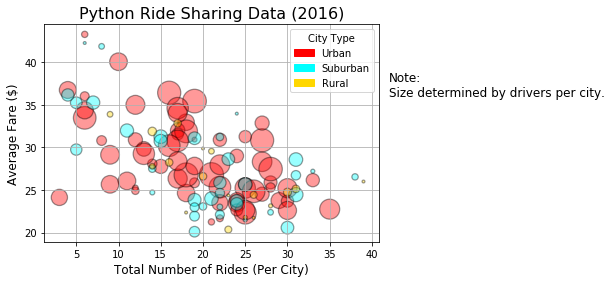

In [6]:
# Build the scatter plots for each city types

fig, ax = plt.subplots()

ax.scatter(df_city['ride_count'],df_city['avg_fare'],s=df_city['driver_count']*8,c=df_city['color'],alpha=.4,edgecolor='black',linewidth=1.25)
ax.plot()
ax.grid()

# Incorporate the other graph properties
ax.set_title('Python Ride Sharing Data (2016)', fontsize=16)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=12)
ax.set_ylabel('Average Fare ($)', fontsize=12)

# Create a legend
urb = mpatches.Patch(color='red', label='Urban')
sub = mpatches.Patch(color='cyan', label='Suburban')
rur = mpatches.Patch(color='gold', label='Rural')
ax.legend(handles=[urb,sub,rur],title='City Type')

# Incorporate a text label regarding circle size
ax.text(42, 36, 'Note:\nSize determined by drivers per city.', dict(size=12))

# Save Figure
fig.savefig('RideShare2016.jpg')

## Total Fares by City Type

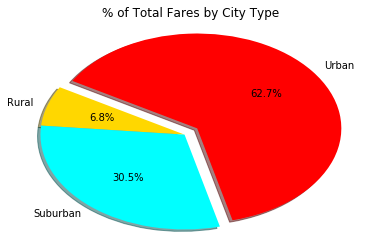

In [7]:
type_grp = df.groupby('type')
ddata = type_grp['fare'].sum().head().values

# Build Pie Chart
demo_label = ['Rural','Suburban','Urban']
dcolor = ['gold','cyan','red']
explode = (0, 0, .11)

plt.pie(ddata, labels=demo_label,colors=dcolor,autopct="%1.1f%%",startangle=150,explode=explode,shadow=True)
plt.axis('auto')
plt.title('% of Total Fares by City Type')

#Save Figure
plt.savefig('TotalFarebyCityType.jpg')

# Show Figure
plt.show()

## Total Rides by City Type

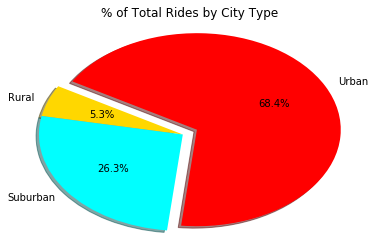

In [8]:
# Calculate Ride Percents
tdata = type_grp['ride_id'].count().head().values

# Build Pie Chart
plt.pie(tdata, labels=demo_label,colors=dcolor,autopct="%1.1f%%",startangle=150,explode=explode,shadow=True)
plt.axis('auto')
plt.title('% of Total Rides by City Type')

#Save Figure
plt.savefig('TotalRidesbyCityType.jpg')

# Show Figure
plt.show()

## Total Drivers by City Type

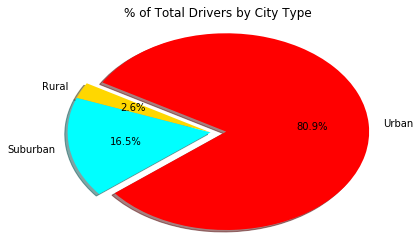

In [9]:
# Calculate Driver Percents
type_grp_c = df_city.groupby('type')
drivers = type_grp_c['driver_count'].sum().values
# Build Pie Chart
plt.pie(drivers, labels=demo_label,colors=dcolor,autopct="%1.1f%%",startangle=150,explode=explode,shadow=True)
plt.axis('auto')
plt.title('% of Total Drivers by City Type')

#Save Figure
plt.savefig('TotalDriversbyCityType.jpg')

# Show Figure
plt.show()